In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

import scipy.stats as st
import scipy

from matplotlib.gridspec import GridSpec

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

import seaborn as sns
from scipy.stats import fisher_exact

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['grid.linewidth'] = 0.5
matplotlib.rcParams['axes.linewidth'] = 0.5
plt.rcParams["font.size"] = 7

cm = 1/2.54  # centimeters in inches

cm = 1/2.54

In [5]:
editorProd = pd.read_csv('../data/figure_3/cumulative.csv', sep='\t')

In [6]:
topFields = ['Political science','Philosophy','Materials science','Medicine']

In [17]:
def plotStep(df, col, ax, bins, marks, main=False):
    
    N = df.shape[0]
    
    x = []
    y = []
    
    markY = [int(N * marks[i]) for i in range(len(marks))]
    markInd = 0
    
    for b in tqdm(bins):
        
        n = df.query(f'{col} >= {b}').shape[0]
        p = n/N
        
        x.append(b)
        y.append(p)
        
        #print(b, markY[markInd])
        
        if markInd < len(marks) and b == marks[markInd]:
            print(b, n, p, marks[markInd])
            markInd += 1
            
            if main:
                ax.plot([b, b], [0, p], color='red', ls='--', lw=0.5)
            
                ax.plot([b, 0.75], [p, p], color='red', ls='--', lw=0.5)
                ax.plot([0.85, 1], [p, p], color='red', ls='--', lw=0.5)
            
                ax.text(0.8, p, f'{int(p*100)}%', color='red', ha='center', va='center')
                
            else:
                ax.plot([b, b], [0, p], color='red', ls='--', lw=0.5)
            
                ax.plot([b, 0.6], [p, p], color='red', ls='--', lw=0.5)
                ax.plot([0.8, 1], [p, p], color='red', ls='--', lw=0.5)
            
                ax.text(0.7, p, f'{int(p*100)}%', color='red', ha='center', va='center')
                
    
    if main:
        ax.plot(x, y, lw=1, color='#377eb8')
        ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
        ax.set_yticklabels(['0%', "10%", "20%", "30%", "40%"])
        
        ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        ax.set_xticklabels(['0%', "20%", "40%", "60%", "80%", "100%"])
        
    else:
        ax.plot(x, y, lw=1, color='#377eb8')
        ax.set_yticks([0, 0.2, 0.4])
        #ax.set_yticklabels([0, "20%", "40%"])
        ax.set_yticklabels(['', "", ""])
        
        
        ax.set_xticks([0, 0.5, 1])
        ax.set_xticklabels(['0%', "50%", "100%"])
        
    
    ax.invert_xaxis()
    
    return y

In [112]:
round(editorProd.query('Percentage >= 0.66').shape[0]/editorProd.shape[0], 2)

0.01

In [ ]:
round(editorProd.query('Percentage >= 0.66').shape[0]/editorProd.shape[0], 2)

  0%|          | 0/100 [00:00<?, ?it/s]

0.5 425 0.03270488649480569 0.5
0.4 563 0.043324355521354364 0.4
0.3 883 0.06794921123509041 0.3
0.2 1604 0.12343208926510196 0.2
0.1 3221 0.24786456329357445 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 25 0.08064516129032258 0.5
0.4 28 0.09032258064516129 0.4
0.3 35 0.11290322580645161 0.3
0.2 52 0.16774193548387098 0.2
0.1 87 0.2806451612903226 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 5 0.06329113924050633 0.5
0.4 6 0.0759493670886076 0.4
0.3 8 0.10126582278481013 0.3
0.2 17 0.21518987341772153 0.2
0.1 28 0.35443037974683544 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 9 0.05325443786982249 0.5
0.4 13 0.07692307692307693 0.4
0.3 22 0.1301775147928994 0.3
0.2 29 0.17159763313609466 0.2
0.1 52 0.3076923076923077 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 49 0.05314533622559653 0.5
0.4 63 0.06832971800433839 0.4
0.3 94 0.1019522776572668 0.3
0.2 171 0.18546637744034708 0.2
0.1 322 0.3492407809110629 0.1


<ipython-input-19-a0d3e402d417>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


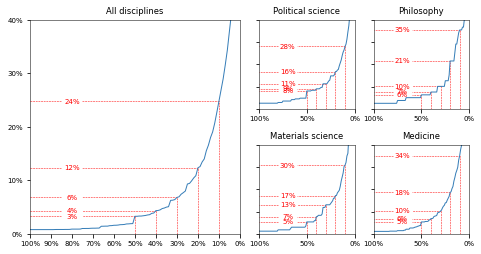

In [19]:
fig = plt.figure(figsize=(20*cm, 10*cm))

gs1 = GridSpec(2, 4, hspace=0.4)

axes = [fig.add_subplot(gs1[0:2, 0:2]),
        fig.add_subplot(gs1[0, 2]), fig.add_subplot(gs1[0, 3]),
        fig.add_subplot(gs1[1, 2]), fig.add_subplot(gs1[1, 3])]

y = plotStep(editorProd, "Percentage", axes[0],
             [x/100 for x in range(100, 0, -1)], [0.5, 0.4, 0.3, 0.2, 0.1], main=True)

y = plotStep(editorProd.query('Field == "Political science"'), "Percentage", axes[1],
             [x/100 for x in range(100, 0, -1)], [0.5, 0.4, 0.3, 0.2, 0.1])
             
y = plotStep(editorProd.query('Field == "Philosophy"'), "Percentage", axes[2],
             [x/100 for x in range(100, 0, -1)], [0.5, 0.4, 0.3, 0.2, 0.1])

y = plotStep(editorProd.query('Field == "Materials science"'), "Percentage", axes[3],
             [x/100 for x in range(100, 0, -1)], [0.5, 0.4, 0.3, 0.2, 0.1])

y = plotStep(editorProd.query('Field == "Medicine"'), "Percentage", axes[4],
             [x/100 for x in range(100, 0, -1)], [0.5, 0.4, 0.3, 0.2, 0.1])

for ax in axes:
    ax.set_xlim(1, 0)
    ax.set_ylim(0, 0.4)

plt.tight_layout()

axes[-1].set_xlabel('')
axes[-3].set_xlabel('')

axes[0].set_title('All disciplines')
axes[1].set_title('Political science')
axes[2].set_title('Philosophy')
axes[3].set_title('Materials science')
axes[4].set_title('Medicine')


axes[0].set_xticks([x/10 for x in range(11)])
axes[0].set_xticklabels([f'{int(x/10*100)}%' for x in range(11)])

for ax in axes[1:]:
    
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
    ax.set_yticklabels(['', '', '', '', ''])


plt.savefig("../figures/main_3_cumulative.pdf", bbox_inches = 'tight', pad_inches = 0)

### supplementary

In [21]:
all_fields = []

for field in editorProd.Field.unique():
    
    subset = editorProd.query(f'Field == "{field}"')
    n = subset.query(f'Percentage >= 0.1').shape[0]
    
    all_fields.append((field, n/subset.shape[0]))
    
sorted(all_fields, key=lambda x: x[1])

[('Sociology', 0.0),
 ('Geography', 0.0),
 ('Computer science', 0.12327773749093546),
 ('Economics', 0.20645397873120647),
 ('Engineering', 0.22418136020151133),
 ('Psychology', 0.234375),
 ('Geology', 0.24444444444444444),
 ('Mathematics', 0.25214676034348166),
 ('Business', 0.2610619469026549),
 ('Political science', 0.2806451612903226),
 ('Biology', 0.2858748594979393),
 ('Physics', 0.293007769145394),
 ('Chemistry', 0.3004694835680751),
 ('Materials science', 0.3076923076923077),
 ('Medicine', 0.3492407809110629),
 ('Philosophy', 0.35443037974683544)]

Philosophy


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 5 0.06329113924050633 0.5
0.4 6 0.0759493670886076 0.4
0.3 8 0.10126582278481013 0.3
0.2 17 0.21518987341772153 0.2
0.1 28 0.35443037974683544 0.1
Medicine


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 49 0.05314533622559653 0.5
0.4 63 0.06832971800433839 0.4
0.3 94 0.1019522776572668 0.3
0.2 171 0.18546637744034708 0.2
0.1 322 0.3492407809110629 0.1
Materials science


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 9 0.05325443786982249 0.5
0.4 13 0.07692307692307693 0.4
0.3 22 0.1301775147928994 0.3
0.2 29 0.17159763313609466 0.2
0.1 52 0.3076923076923077 0.1
Chemistry


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 19 0.0297339593114241 0.5
0.4 32 0.050078247261345854 0.4
0.3 54 0.08450704225352113 0.3
0.2 99 0.15492957746478872 0.2
0.1 192 0.3004694835680751 0.1
Physics


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 37 0.041065482796892344 0.5
0.4 49 0.05438401775804662 0.4
0.3 80 0.08879023307436182 0.3
0.2 130 0.14428412874583796 0.2
0.1 264 0.293007769145394 0.1
Biology


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 88 0.032971150243536904 0.5
0.4 122 0.04571000374672162 0.4
0.3 209 0.07830648182840015 0.3
0.2 393 0.14724615961034096 0.2
0.1 763 0.2858748594979393 0.1
Political science


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 25 0.08064516129032258 0.5
0.4 28 0.09032258064516129 0.4
0.3 35 0.11290322580645161 0.3
0.2 52 0.16774193548387098 0.2
0.1 87 0.2806451612903226 0.1
Business


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 12 0.02654867256637168 0.5
0.4 15 0.033185840707964605 0.4
0.3 29 0.06415929203539823 0.3
0.2 59 0.13053097345132744 0.2
0.1 118 0.2610619469026549 0.1
Mathematics


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 44 0.03434816549570648 0.5
0.4 64 0.04996096799375488 0.4
0.3 88 0.06869633099141297 0.3
0.2 142 0.11085089773614364 0.2
0.1 323 0.25214676034348166 0.1
Geology


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 6 0.02666666666666667 0.5
0.4 7 0.03111111111111111 0.4
0.3 13 0.057777777777777775 0.3
0.2 24 0.10666666666666667 0.2
0.1 55 0.24444444444444444 0.1
Psychology


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 24 0.028846153846153848 0.5
0.4 34 0.040865384615384616 0.4
0.3 51 0.06129807692307692 0.3
0.2 89 0.10697115384615384 0.2
0.1 195 0.234375 0.1
Engineering


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 11 0.027707808564231738 0.5
0.4 14 0.03526448362720403 0.4
0.3 25 0.06297229219143577 0.3
0.2 41 0.10327455919395466 0.2
0.1 89 0.22418136020151133 0.1
Economics


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 76 0.027869453612027868 0.5
0.4 94 0.03447011367803447 0.4
0.3 141 0.0517051705170517 0.3
0.2 288 0.10561056105610561 0.2
0.1 563 0.20645397873120647 0.1
Computer science


  0%|          | 0/100 [00:00<?, ?it/s]

0.5 20 0.014503263234227702 0.5
0.4 22 0.01595358955765047 0.4
0.3 34 0.024655547498187092 0.3
0.2 70 0.050761421319796954 0.2
0.1 170 0.12327773749093546 0.1


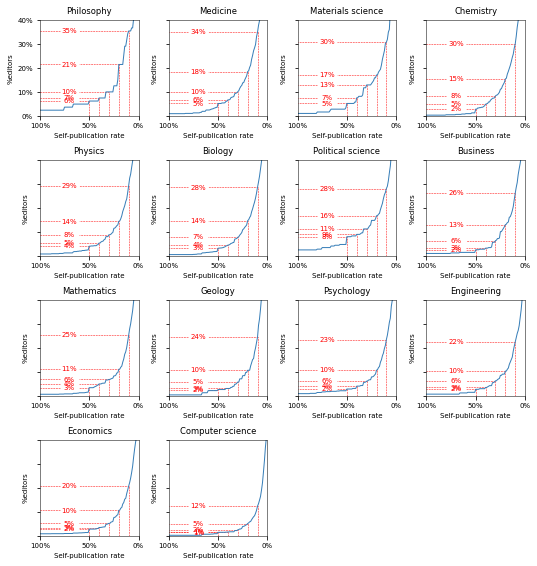

In [22]:
fig = plt.figure(figsize=(19*cm, 20*cm))

axes = [plt.subplot(4, 4, i+1) for i in range(14)]
ind = 0

for field, percentage in sorted(all_fields, key=lambda x: x[1], reverse=True):
    
    if field == 'Geography': continue
    if field == 'Sociology': continue
        
    print(field)
    axes[ind].set_title(field)
    
    y = plotStep(editorProd.query(f'Field == "{field}"'), "Percentage", axes[ind],
             [x/100 for x in range(100, 0, -1)], [0.5, 0.4, 0.3, 0.2, 0.1])
        
    ind += 1
    
for ax in axes:
    
    ax.set_xlim(1, 0)
    ax.set_ylim(0, 0.4)
    
    ax.set_xlabel('Self-publication rate')
    ax.set_ylabel('%editors')
    
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
    ax.set_yticklabels(['', '', '', '', ''])
    
axes[0].set_yticklabels(['0%', '10%', '20%', '30%', '40%'])
axes[4].set_yticklabels(['', '', '', '', ''])
axes[8].set_yticklabels(['', '', '', '', ''])

plt.tight_layout()

plt.savefig("../figures/sup_3_cumulative_all_field.pdf", bbox_inches = 'tight', pad_inches = 0)

# Match

In [11]:
from scipy.stats import ttest_ind, wilcoxon, ks_2samp

In [12]:
def caclCIValues(a, conf=0.95):
    sem, m = scipy.stats.sem(a), scipy.stats.t.ppf((1+conf)/2., len(a)-1)
    return m*sem

def compareEachYear(matchedEditor, matchedAuthor, ediCol='EdiPercent', autCol='AutPercent'):

    df = []
    
    for year in [-4, -3, -2, -1, 0]:

        anualEdi = matchedEditor.query(f'EditorYear == {year}')[ediCol]
        anualAut = matchedAuthor.query(f'EditorYear == {year}')[autCol]
        
        stdDiff = (anualEdi.mean() - anualAut.mean())/np.sqrt((np.var(anualEdi) + np.var(anualAut))/2)
        
        ediCI = caclCIValues(anualEdi)
        autCI = caclCIValues(anualAut)
        
        t1 = ttest_ind(anualEdi, anualAut)
        t2 = wilcoxon(anualEdi, anualAut)
        t3 = ks_2samp(anualEdi, anualAut)
        
        df.append({'Self publication rate cohort':None,
                   'Year since becoming editor': year,
                   'Author mean': round(anualAut.mean(), 3),
                   'Editor mean': round(anualEdi.mean(), 3),
                   'Standardized difference': round(stdDiff, 3),
                   'P-value (Wilcoxon test)': round(t2.pvalue, 3) if t2.pvalue >= 0.001 else 'p < 0.001',
                   'P-value (Kolmogorov–Smirnov test)': round(t3.pvalue, 3) if t3.pvalue >= 0.001 else 'p < 0.001',
                  })
        
    return pd.DataFrame(df)

In [13]:
matchedEditors = pd.read_csv('../data/figure_3/EditorsMatch.csv', sep='\t')
matchedAuthors = pd.read_csv('../data/figure_3/AuthorsMatch.csv', sep='\t')

In [14]:
dfs = []

for i in range(4, -1, -1):
    
    df = compareEachYear(matchedEditors.query('Cohort==@i'), matchedAuthors.query('Cohort==@i'))
    df['Self publication rate cohort'] = f'>= 0.{i+1}'
    
    dfs.append(df)
    
dfs = pd.concat(dfs, ignore_index=True, sort=False)
dfs.shape

(25, 7)

In [15]:
print(dfs.to_latex(index=False))

\begin{tabular}{lrrrrlr}
\toprule
Self publication rate cohort &  Year since becoming editor &  Author mean &  Editor mean &  Standardized difference & P-value (Wilcoxon test) &  P-value (Kolmogorov–Smirnov test) \\
\midrule
                      >= 0.5 &                          -4 &        0.067 &        0.085 &                    0.077 &                   0.500 &                              1.000 \\
                      >= 0.5 &                          -3 &        0.054 &        0.084 &                    0.140 &                   0.132 &                              0.969 \\
                      >= 0.5 &                          -2 &        0.062 &        0.087 &                    0.104 &                   0.307 &                              1.000 \\
                      >= 0.5 &                          -1 &        0.046 &        0.086 &                    0.208 &                   0.038 &                              0.561 \\
                      >= 0.5 &                 

In [16]:
def plotMatched(ax, matchedEditor, matchedAuthor, matched=False,
                ediCol='EdiPercent', autCol='AutPercent', color='#4daf4a', left=1, right=5, ytop=0.6):
    
    edi = matchedEditor.query(f'EditorYear > 0').query(f'EditorYear <= {right}')
    aut = matchedAuthor.query(f'EditorYear > 0').query(f'EditorYear <= {right}')
    
    sns.lineplot(data=aut, x='EditorYear', y=autCol, ax=ax, color=color, lw=0.5)
    sns.lineplot(data=edi, x='EditorYear', y=ediCol, ax=ax, color='#377eb8', lw=0.5)
    
    if left < 1:
        edi = (
            matchedEditor.query(f'EditorYear >= {left}').query(f'EditorYear <= 0')
        )
        aut = (
            matchedAuthor.query(f'EditorYear >= {left}').query(f'EditorYear <= 0')
        )
        
        sns.lineplot(data=aut, x='EditorYear', y=autCol, ax=ax, color=color, lw=0.5)
        sns.lineplot(data=edi, x='EditorYear', y=ediCol, ax=ax, color='#377eb8', lw=0.5)
        
        ax.plot([0.5, 0.5], [0, ytop], lw=0.5, color='grey', ls=':')

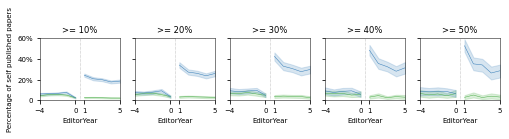

In [17]:
fig = plt.figure(figsize=(18*cm, 4*cm))

axes = [plt.subplot(1, 5, i+1) for i in range(5)]

for i in range(5):
    
    plotMatched(axes[i], matchedEditors.query('Cohort==@i'), matchedAuthors.query('Cohort==@i'), left=-4, right=5)
    
    axes[i].set_ylim(0, 0.6)
    axes[i].set_xlim(-4, 5)
    
    axes[i].set_title(f'>= {i+1}0%')
    
    if i==0: axes[i].set_ylabel('Percentage of self published papers')
    else: axes[i].set_ylabel('')
    
    axes[i].set_yticks([0, 0.2, 0.4, 0.6])
    
    if i==0: axes[i].set_yticklabels([0, "20%", "40%", "60%"])
    else: axes[i].set_yticklabels(['', "", "", ""])
        
    axes[i].set_xticks([-4, 0, 1, 5])
    
    
plt.tight_layout()
#plt.savefig("../figures/sup_3_matched_before_and_after.pdf", bbox_inches = 'tight', pad_inches = 0)

# Match and peer

In [18]:
ediPercent = pd.read_csv('../data/figure_3/EditorsPeer.csv', sep='\t')
peerPercent = pd.read_csv('../data/figure_3/PeerTrend.csv', sep='\t')

matchedEditors = pd.read_csv('../data/figure_3/EditorsMatch.csv', sep='\t')
matchedAuthors = pd.read_csv('../data/figure_3/AuthorsMatch.csv', sep='\t')

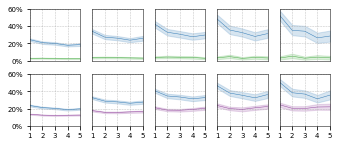

In [27]:
fig = plt.figure(figsize=(12*cm, 5.2*cm))

axes = [plt.subplot(2, 5, i+1) for i in range(10)]

cutoffs = [0.1, 0.2, 0.3, 0.4, 0.5]

for ind, i in enumerate(range(5)):
    
    plotMatched(axes[i], matchedEditors.query('Cohort==@ind'), matchedAuthors.query('Cohort==@ind'))


for ind, i in enumerate(range(5, 10)):
    
    plotMatched(
        axes[i], ediPercent.query('Cohort==@ind'), peerPercent.query('Cohort==@ind'),
        ediCol='EdiPercent', autCol='PeerPercent', color='#984ea3'
    )
    
    
for i in range(10):
    
    axes[i].set_ylabel('') # Percentage of self published papers
    axes[i].set_xlabel('') # Year after becoming and editor
    
    axes[i].set_ylim(0, 0.6)
    axes[i].set_yticks([0, 0.2, 0.4, 0.6])
    
    axes[i].set_xlim(1, 5)
    
    
    if i%5==0:
        axes[i].set_yticklabels(['0%', "20%", "40%", "60%"])
    else:
        axes[i].set_yticklabels(['', "", "", ""])
        axes[i].tick_params(axis='y', length=0)
        
    
    axes[i].set_xticks([1,2,3,4,5])
    
    if i<5:
        axes[i].set_xticklabels(['', "", "", "", ''])
        axes[i].tick_params(axis='x', length=0)
        
    #axes[i].set_title(f'>= {int(cutoffs[ind]*100)}%')
    # remove the ticks
    # add grid
    axes[i].grid(ls='--', lw=0.5, alpha=0.8)
    
plt.tight_layout()
plt.savefig("../figures/main_3_temporal.pdf", bbox_inches = 'tight', pad_inches = 0)

# Editor-in-chief

In [20]:
chiefAndBoard = pd.read_csv('../data/figure_3/EICandBoard.csv', sep='\t')

In [21]:
pearsonR, pearsonP = scipy.stats.pearsonr(chiefAndBoard.ChiefPercent, chiefAndBoard.BoardAvg)

In [22]:
"{:.2e}".format(pearsonP)

'2.05e-110'

(-0.02, 1.02)

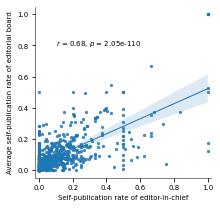

In [10]:
fig = plt.figure(figsize=(8*cm, 8*cm))

ax = plt.gca()

sns.regplot(data=chiefAndBoard, x='ChiefPercent', y='BoardAvg', ax=ax, scatter_kws={'s': 5},line_kws={'linewidth': 1} )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Self-publication rate of editor-in-chief')
ax.set_ylabel('Average self-publication rate of editorial board')

ax.text(0.1, 0.8, f'$r$ = {"{:.2f}".format(pearsonR)}, $p$ = {"{:.2e}".format(pearsonP)}')

ax.set_xlim(-0.02, 1.02)

#plt.savefig("../figures/sup_3_eic.pdf", bbox_inches = 'tight', pad_inches = 0)

In [5]:
chiefAndBoardLog = (
    chiefAndBoard.query('BoardAvg != 0').query('ChiefPercent != 0')
    .assign(BoardAvg = lambda df: df.BoardAvg.apply(lambda x: np.log10(x) if x != 0 else 0))
    .assign(ChiefPercent = lambda df: df.ChiefPercent.apply(lambda x: np.log10(x) if x != 0 else 0))
)

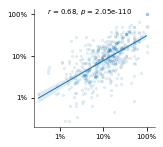

In [8]:
fig = plt.figure(figsize=(5.5*cm, 5.5*cm))

ax = plt.gca()

sns.regplot(data=chiefAndBoardLog, x='ChiefPercent', y='BoardAvg', ax=ax, scatter_kws={'s': 5, 'alpha': 0.1},line_kws={'linewidth': 1} )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('')#Self-publication rate of editor-in-chief
ax.set_ylabel('')#Average self-publication\nrate of editorial board

ax.set_xticks([-2, -1, 0])
#ax.set_xticklabels(["$10^{-2}$", "$10^{-1}$", "$10^{0}$"])
ax.set_xticklabels(["1%", "10%", "100%"])


ax.set_yticks([-2, -1, 0])
#ax.set_yticklabels(["$10^{-2}$", "$10^{-1}$", "$10^{0}$"])
ax.set_yticklabels(["1%", "10%", "100%"])


ax.set_xlim(-2.6, 0.2)

ax.text(-2.3, 0.008, f'$r$ = {"{:.2f}".format(pearsonR)}, $p$ = {"{:.2e}".format(pearsonP)}')

plt.savefig("../figures/main_3_eic.pdf", bbox_inches = 'tight', pad_inches = 0)

# Gender

In [103]:
def compareMaleFemale(editors, sortBy='Percentage'):
    
    editors = editors.sort_values(by=sortBy, ascending=False)
    
    N = editors.shape[0]
    
    maleCount = editors.query('gender == "male"').shape[0]
    femaleCount = editors.query('gender == "female"').shape[0]

    print(maleCount, femaleCount)

    for i in [i/100 for i in range(1, 11)]:

        subset=editors.head(int(i*N))

        m = subset.query('gender == "male"').shape[0]
        f = subset.query('gender == "female"').shape[0]

        pValue = fisher_exact([[m, maleCount-m], [f, femaleCount - f]])[1]

        if m/maleCount > f/femaleCount: print('more male', end='\t')
        else: print('less', end='\t')

        pStr = round(pValue, 4) if pValue >= 0.05 else '*'

        print(i, round(m/maleCount*100, 2), round(f/femaleCount*100, 2), pStr, m, f)
        
        yield (m, maleCount, f, femaleCount)
        
def plotPvalue(ax, x, y, pVal, ytop, lw=0.2, c='black'):
    # x: [x0, x1]
    # y: [y0, y1]
    ylo, yhi = ax.get_ylim()
    
    height = ytop
    gap = ytop * 0.02
    vlength = ytop * 0.02
    
    yPos = height + gap + vlength
    ax.hlines(yPos, x[0], x[1], color=c, lw=lw)
    ax.vlines(x[0], height + gap, yPos, color=c, lw=lw)
    ax.vlines(x[1], height + gap, yPos, color=c, lw=lw)
    
    #stars = '***' if pVal < 0.001 else '**' if pVal < 0.01 else '*' if pVal < 0.05 else f'p={round(pVal, 2)}'
    stars = f"$p$={round(pVal, 3)}" if pVal >= 0.001 else "$p$={:.2e}".format(pVal)
    offset = 0.01 if pVal < 0.05 else 0.04
    
    ax.text((x[0] + x[1])/2-0.3, yPos + offset*ytop, stars, ha='center', color=c)
    
    ax.set_ylim(ylo, (yPos + offset*ytop)*1.2)

def plotBar(ax, m, mAll, f, fAll, c, x=[1, 2], ytop=None, confidence=0.95, showP = True):
    
    means = [m/mAll, f/fAll]
    
    p1 = m/mAll
    p2 = f/fAll
    
    errs = [np.sqrt(p1*(1-p1)/mAll) * st.t.ppf((1 + confidence) / 2., mAll-1),
            np.sqrt(p2*(1-p2)/fAll) * st.t.ppf((1 + confidence) / 2., fAll-1)
           ]
    
    p_value = scipy.stats.fisher_exact(np.array([[m, mAll-m], [f, fAll-f]]))
    
    col = [c, c]
    barCol = ['white', c]
    
    bars = ax.bar(x, means, yerr=errs, width=0.8,alpha=0.8,
                  color=barCol,ecolor=col, edgecolor=col, linewidth=0.5,
                  error_kw={'elinewidth':0.5})
    
    bars[0].set_hatch('/////')
    
    if ytop is None:
        ytop = max(means[0] +errs[0], means[1]+errs[1])
    
    if showP:
        print('p value', p_value)
        plotPvalue(ax, x, [means[i] + errs[i] for i in range(len(means))], p_value[1], ytop)
    
    return max(means[0] +errs[0], means[1]+errs[1])

In [29]:
editors = pd.read_csv('../data/figure_3/EditorPercentageGender.csv', sep='\t')

In [91]:
toPlotBars = [(m, mAll, f, fAll) for m, mAll, f, fAll in compareMaleFemale(editors, 'AfAvg')]

11017 1978
more male	0.01 1.08 0.51 * 119 10
more male	0.02 2.18 0.96 * 240 19
more male	0.03 3.19 1.92 * 351 38
more male	0.04 4.17 3.03 * 459 60
more male	0.05 5.19 3.89 * 572 77
more male	0.06 6.24 4.6 * 688 91
more male	0.07 7.28 5.41 * 802 107
more male	0.08 8.34 6.07 * 919 120
more male	0.09 9.33 7.13 * 1028 141
more male	0.1 10.4 7.74 * 1146 153


p value (2.148944760506515, 0.018377592247254465)
p value (2.296117950997006, 0.00015468030508644296)
p value (1.6800556613735727, 0.001982225546050242)
p value (1.3897234324682706, 0.017647565331380163)
p value (1.3520071120837038, 0.013594465747821223)
p value (1.381213036165113, 0.003940366137074453)
p value (1.3728592275424174, 0.002176509445463139)
p value (1.4091090645012214, 0.0004399527413842141)
p value (1.3407911823573306, 0.0013594161795122863)
p value (1.384825027164143, 0.0002080011276296638)


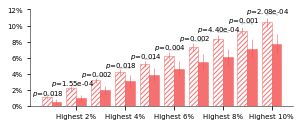

In [104]:
fig = plt.figure(figsize=(12*cm, 4.5*cm))
ax = plt.gca()

for ind, (m, mAll, f, fAll) in enumerate(toPlotBars):
 
    plotBar(ax, m, mAll, f, fAll, "#f34d4d", x=[ind*2, ind*2+0.8], ytop=None, confidence=0.95, showP = True)
    
ax.set_xticks([2*x + 0.4 for x in range(1, 11, 2)])
ax.set_xticklabels([f'Highest {x+1}%' for x in range(1, 11, 2)])

#ax.set_ylabel('Percentage of editors among those with\nhighest self-publication rate by gender')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yticks([0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12])
ax.set_yticklabels(["0%", "2%", "4%", '6%', '8%', '10%', '12%'])
ax.set_ylim(0, 0.12)


plt.savefig("../figures/main_3_gender.pdf", bbox_inches = 'tight', pad_inches = 0)